In [129]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import pickle

#To test Iterative imputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

## Combining Cardio dataset with Sleep dataset
### can be skipped using final cleaned file

In [23]:
data = pd.read_csv('/content/CVD_Integrated_Cleaned.csv')
sleep_data = pd.read_csv('/content/shhs1-dataset-0.13.0.csv')

In [24]:
data.shape
sleep_data.shape

(5804, 1279)

In [25]:
sleep_data.isna().sum()

nsrrid         0
pptid          0
ecgdate     1600
lvh3_1      1689
lvh3_3      2455
            ... 
Chinqual       0
Oximqual       0
Posqual        0
LightOff     468
rcrdtime       0
Length: 1279, dtype: int64

### Merge in Sleep Data dataset based on patient ID (nsrrid)

In [26]:
combine_data = data.merge(sleep_data, on='nsrrid', how='left')

In [27]:
#combine_data.to_csv('Combined_Data.csv')

# Start from here using clean dataset

In [4]:
data_simp = pd.read_csv('Combined_Data_Cleaned.csv')
#data_iter = pd.read_csv('Combined_Data_Cleaned.csv')

In [5]:
data_simp.isna().sum()

nsrrid        0
5_CVD_YN      0
chf           0
mi            0
angina        0
           ... 
EOGLqual      0
Chinqual      0
Oximqual      0
Posqual       0
LightOff    361
Length: 738, dtype: int64

In [6]:
data_simp.describe()

,nsrrid,5_CVD_YN,chf,mi,angina,stroke,chd,age_s1_common,race_common,gender_x,...,Chstqual,Abdoqual,EEG1qual,EEG2qual,EOGRqual,EOGLqual,Chinqual,Oximqual,Posqual,LightOff
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,...,4335.000000,4334.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,3976.000000
mean,203170.070556,0.527554,0.181462,0.070325,0.472677,0.063177,0.127738,62.826608,1.205672,1.558681,...,3.380623,3.403553,3.543233,3.482131,3.855661,3.850357,3.425409,3.904081,3.918377,0.434356
std,1667.669657,0.499298,0.762683,0.303558,0.600394,0.388573,0.333836,10.960382,0.551445,0.496602,...,0.916945,0.910637,0.712329,0.804001,0.451944,0.462097,0.947433,0.302243,0.286177,0.495734
min,200077.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,201635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
50%,203412.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,204588.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,71.000000,1.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,205804.000000,1.000000,13.000000,4.000000,6.000000,9.000000,1.000000,90.000000,3.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


## We will need to impute missing values in order to use ML models
### Features with >700 null values have already been removed due to invalidity

In [7]:
simp = SimpleImputer(missing_values=np.nan, strategy='median')
#iter = IterativeImputer(random_state=4, initial_strategy='median', max_iter=6)

### Using Simple imputer:

In [8]:
data_simp[:] = simp.fit_transform(data_simp)

In [9]:
data_simp.isna().sum()

nsrrid      0
5_CVD_YN    0
chf         0
mi          0
angina      0
           ..
EOGLqual    0
Chinqual    0
Oximqual    0
Posqual     0
LightOff    0
Length: 738, dtype: int64

### Using Iterative imputer:

Ended up not working

In [ ]:
#crashed due to overuse of RAM

#data_iter[:] = iter.fit_transform(data_iter)

## Search for Imbalance in the target variable

In [31]:
#See how many observations had Cardiovascular disease
print(data[data['5_CVD_YN']==1].shape)
print(data[data['5_CVD_YN']==0].shape)

(2288, 738)
(2049, 738)


It appears that our dataset is not imbalanced

## Split our data into training and testing data

In [134]:
#remove duplicative columns from dataset, split into dependent and independent variables
y_data = data_simp['5_CVD_YN']
X_data = data_simp.drop(columns=['5_CVD_YN','nsrrid','chf','mi','angina','stroke','chd','age_s1','age_category_s1',
                                'race_common','hlthlm25','waist_x','ethnicity_x','diasbp','educat_x','diasbp_av'])
X_data.head()

,age_s1_common,gender_x,mstat,cmp1yr25,modact25,lift25,climbs25,climb125,bend25,bathe25,...,Chstqual,Abdoqual,EEG1qual,EEG2qual,EOGRqual,EOGLqual,Chinqual,Oximqual,Posqual,LightOff
0,41.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
1,54.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
2,56.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,2.0,3.0,...,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,0.0
3,54.0,1.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
4,40.0,2.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=4)

### Test Random Forest Models for best parameters

#### Test baseline Random Forest

In [135]:
rf = RandomForestClassifier(random_state=4, n_estimators=100)

In [136]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

In [137]:
pred = rf.predict(X_test)
prob = rf.predict_proba(X_test)
acc = metrics.accuracy_score(y_test,pred)
auc = metrics.roc_auc_score(y_test,prob[:,1])
recall = metrics.recall_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(acc,auc,recall,f1)

0.7339385474860335 0.8040168105442258 0.8107049608355091 0.7652495378927912


#### Loop through hyper parameters to find best model
#### In our context, recall will be more important than precision

In [138]:
methods = ['gini','entropy']
max_depth_options = [2,6,10,14,18,22]
estimator_options = [100,200, 300, 400, 500]

In [139]:
#Loop through parameters and print scores to find optimal
for method in methods:
    for depth in max_depth_options:
        for estimator in estimator_options:
            rf = RandomForestClassifier(random_state=4, n_estimators=estimator, criterion=method, max_depth=depth)
            rf.fit(X_train,y_train)
            pred = rf.predict(X_test)
            prob = rf.predict_proba(X_test)
            acc = metrics.accuracy_score(y_test,pred)
            auc = metrics.roc_auc_score(y_test,prob[:,1])
            recall = metrics.recall_score(y_test,pred)
            f1 = metrics.f1_score(y_test,pred)
            print('With criterion:', method, 'max_depth:',depth, 'and n_estimators:', estimator)
            print('acc = ', round(acc,3), 'auc = ', round(auc,3), 'recall = ',round(recall,3), 'F1 score = ', round(f1,3))
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

With criterion: gini max_depth: 2 and n_estimators: 100
acc =  0.655 auc =  0.715 recall =  0.772 F1 score =  0.705
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: gini max_depth: 2 and n_estimators: 200
acc =  0.66 auc =  0.72 recall =  0.769 F1 score =  0.708
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: gini max_depth: 2 and n_estimators: 300
acc =  0.645 auc =  0.709 recall =  0.751 F1 score =  0.693
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: gini max_depth: 2 and n_estimators: 400
acc =  0.647 auc =  0.708 recall =  0.751 F1 score =  0.695
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: gini max_depth: 2 and n_estimators: 500
acc =  0.648 auc =  0.708 recall =  0.757 F1 score =  0.697
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: gini max_depth: 6 and n_estimators: 100
acc =  0.711 auc =  0.773 recall =  0.815 F1 score =  0.751
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

With criterion: entropy max_depth: 14 and n_estimators: 400
acc =  0.74 auc =  0.805 recall =  0.828 F1 score =  0.773
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: entropy max_depth: 14 and n_estimators: 500
acc =  0.743 auc =  0.806 recall =  0.826 F1 score =  0.775
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: entropy max_depth: 18 and n_estimators: 100
acc =  0.723 auc =  0.803 recall =  0.799 F1 score =  0.755
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: entropy max_depth: 18 and n_estimators: 200
acc =  0.728 auc =  0.809 recall =  0.817 F1 score =  0.763
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: entropy max_depth: 18 and n_estimators: 300
acc =  0.733 auc =  0.811 recall =  0.817 F1 score =  0.766
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With criterion: entropy max_depth: 18 and n_estimators: 400
acc =  0.745 auc =  0.812 recall =  0.832 F1 score =  0.777
~~~~~~

In [140]:
#Highest resulting combination of Recall and Accuarcy used hyper parameters: entropy, 10 max depth, 400 estimators
depth = 10
method = 'entropy'
estimator = 400
rf = RandomForestClassifier(random_state=4, n_estimators=estimator, criterion=method, max_depth=depth)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
prob = rf.predict_proba(X_test)
acc = metrics.accuracy_score(y_test,pred)
auc = metrics.roc_auc_score(y_test,prob[:,1])
recall = metrics.recall_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print('With criterion:', method, 'max_depth:',depth, 'and n_estimators:', estimator)
print('acc = ', round(acc,3), 'auc = ', round(auc,3), 'recall = ',round(recall,3), 'F1 score = ', round(f1,3))

With criterion: entropy max_depth: 10 and n_estimators: 400
acc =  0.74 auc =  0.806 recall =  0.833 F1 score =  0.774


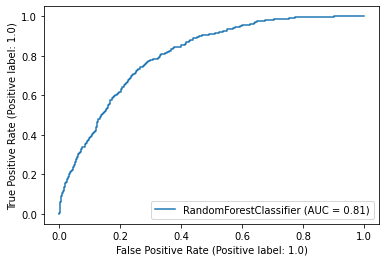

In [141]:
metrics.plot_roc_curve(rf, X_test, y_test)

### Determining Feature importance based on impurity (entropy)

In [142]:
feat_importance = rf.feature_importances_

In [153]:
feature_names = [X_test.columns[i] for i in range(X_test.shape[1])]

age_s1_common    0.069236
gender_x         0.000136
mstat            0.001583
cmp1yr25         0.001129
modact25         0.000413
                   ...   
EOGLqual         0.000306
Chinqual         0.000521
Oximqual         0.000088
Posqual          0.000181
LightOff         0.001699
Length: 722, dtype: float64

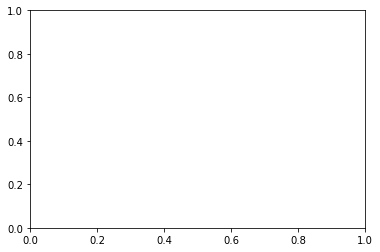

In [144]:
forest_importances = pd.Series(feat_importance, index=feature_names)
fig, ax = plt.subplots()
forest_importances

<AxesSubplot:>

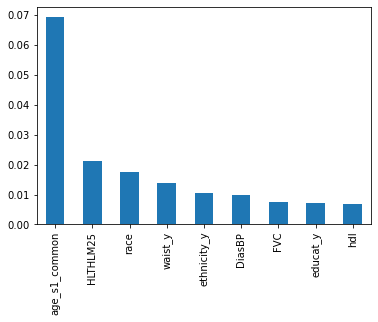

In [147]:
forest_importances.sort_values(ascending=False)[0:9]
forest_importances.sort_values(ascending=False)[0:9].plot.bar()

### Save and Practice Loading back in model

In [162]:
filepath = 'final_RF_model.sav'
pickle.dump(rf, open(filepath, 'wb'))
X_test.to_csv('Input_Variables.csv', index=False)

In [149]:
test_load = pickle.load(open(filepath, 'rb'))
pred = test_load.predict(X_test)
prob = test_load.predict_proba(X_test)
acc = metrics.accuracy_score(y_test,pred)
auc = metrics.roc_auc_score(y_test,prob[:,1])
recall = metrics.recall_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print('With criterion:', method, 'max_depth:',depth, 'and n_estimators:', estimator)
print('acc = ', round(acc,3), 'auc = ', round(auc,3), 'recall = ',round(recall,3), 'F1 score = ', round(f1,3))

With criterion: entropy max_depth: 10 and n_estimators: 400
acc =  0.74 auc =  0.806 recall =  0.833 F1 score =  0.774
